In [15]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split data to training & test 
from sklearn.model_selection import train_test_split

# standard datasets
from sklearn.preprocessing import StandardScaler

# classifier algo
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# clustering algo
from sklearn.cluster import KMeans

from sklearn import metrics


# COLLECT DATA

In [16]:
#import dataset
data = pd.read_csv("../processed_data/spambase.csv")
data.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [17]:
print(data.columns)
print(len(data.columns))
print(len(data))

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [18]:
# check if any column is null 
data.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

# EDA

In [19]:
grouped_data = data.groupby(data['class'])
print(grouped_data[data.columns[0]].describe(include='all'))

        count      mean       std  min  25%  50%   75%   max
class                                                       
0      2788.0  0.073479  0.297838  0.0  0.0  0.0  0.00  4.34
1      1813.0  0.152339  0.310645  0.0  0.0  0.0  0.17  4.54


In [20]:
data[data[data.columns[0]] == 0]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.0,0.64,0.64,0.0,0.32,0.0,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.778,0.000,0.0,3.756,61,278,1
3,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.137,0.0,0.137,0.000,0.0,3.537,40,191,1
4,0.0,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.135,0.0,0.135,0.000,0.0,3.537,40,191,1
5,0.0,0.00,0.00,0.0,1.85,0.0,0.00,1.85,0.00,0.00,...,0.0,0.223,0.0,0.000,0.000,0.0,3.000,15,54,1
6,0.0,0.00,0.00,0.0,1.92,0.0,0.00,0.00,0.00,0.64,...,0.0,0.054,0.0,0.164,0.054,0.0,1.671,4,112,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,1.052,0.000,0.0,1.000,1,6,0
4594,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.630,0.0,0.000,0.000,0.0,1.727,5,19,0
4595,0.0,0.00,1.19,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.0,1.000,1,24,0
4597,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.353,0.000,0.0,1.555,4,14,0


In [21]:
print (f"{'col_idx':<9}{'columns':<30}{'0s':<10}{'other': <10}")
for i in range(len(data.columns)):
    c = data[data[data.columns[i]] == 0].shape[0]
    print (f"{i:<9}{data.columns[i]:<30}{c:<10}{len(data)-c: <10}")

col_idx  columns                       0s        other     
0        word_freq_make                3548      1053      
1        word_freq_address             3703      898       
2        word_freq_all                 2713      1888      
3        word_freq_3d                  4554      47        
4        word_freq_our                 2853      1748      
5        word_freq_over                3602      999       
6        word_freq_remove              3794      807       
7        word_freq_internet            3777      824       
8        word_freq_order               3828      773       
9        word_freq_mail                3299      1302      
10       word_freq_receive             3892      709       
11       word_freq_will                2276      2325      
12       word_freq_people              3749      852       
13       word_freq_report              4244      357       
14       word_freq_addresses           4265      336       
15       word_freq_free                3

58


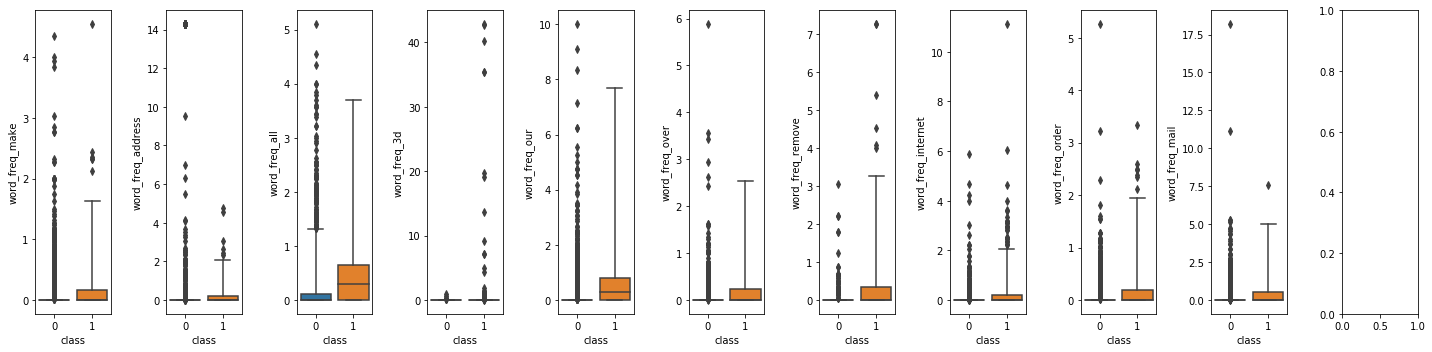

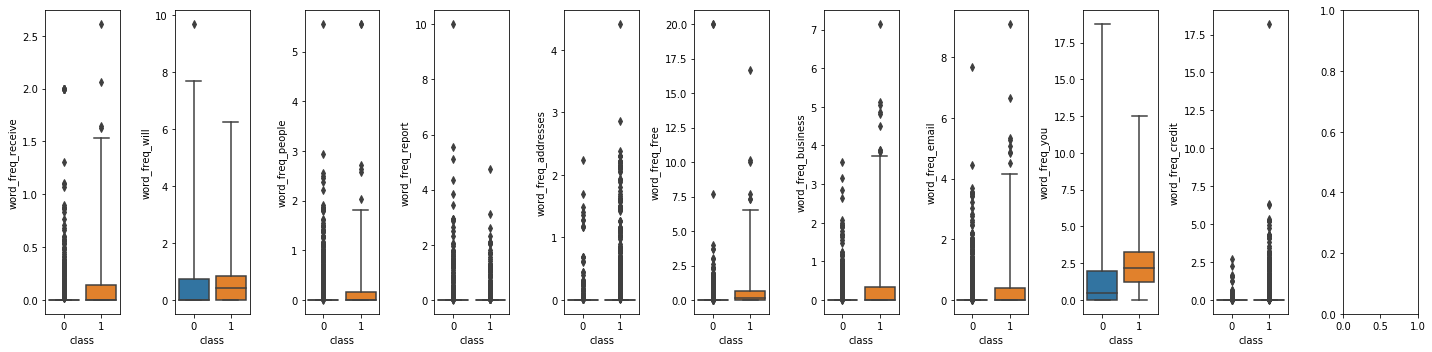

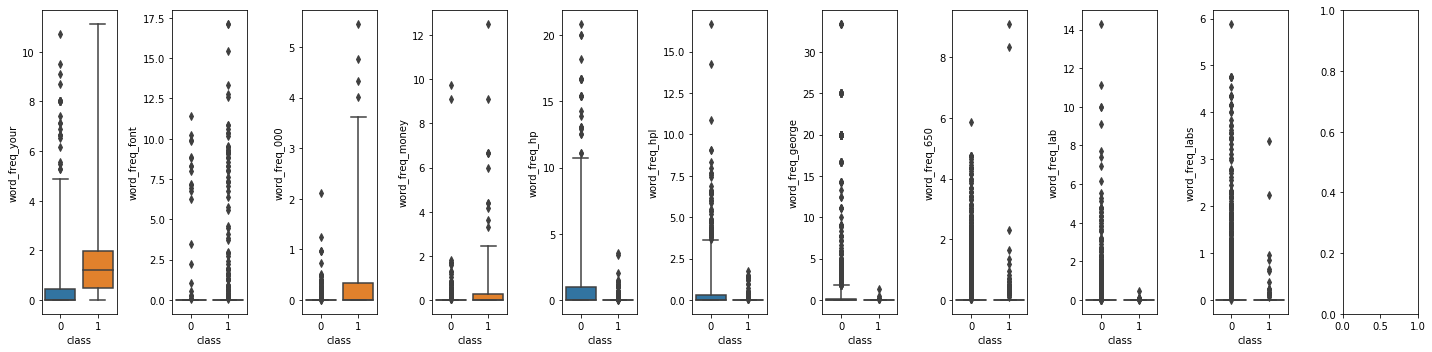

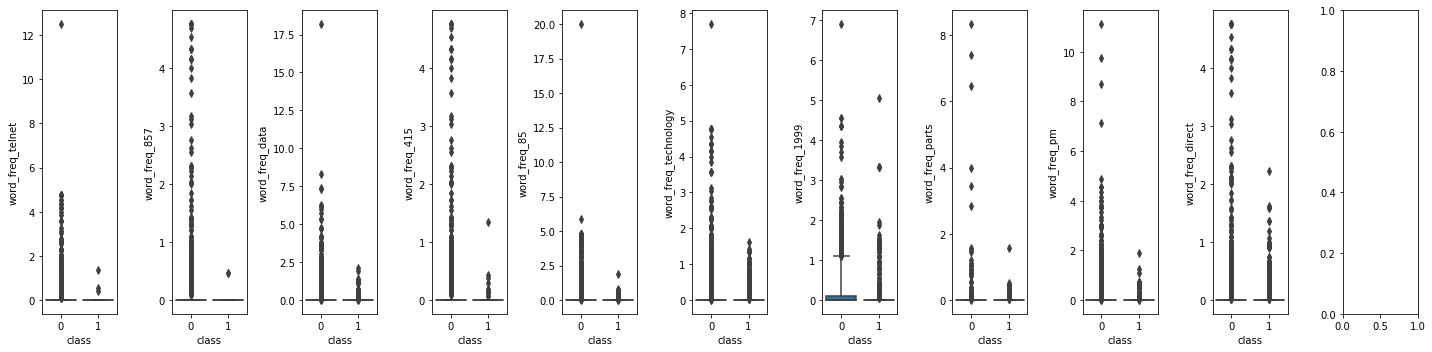

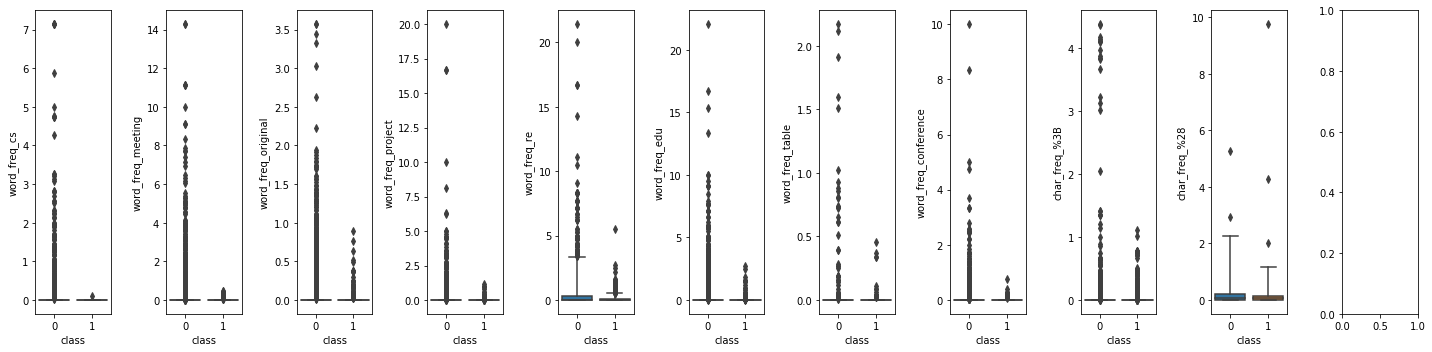

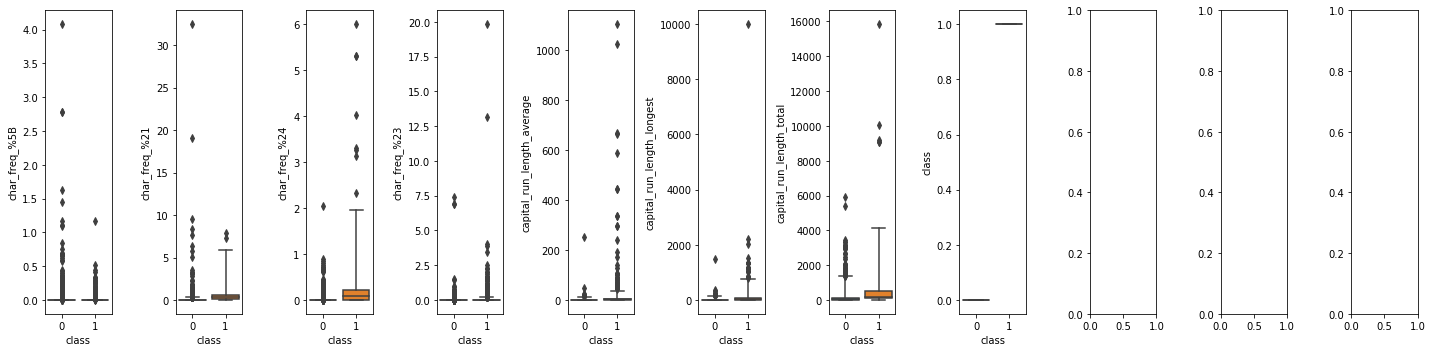

In [60]:
# TODO: plot for all columns
import math
columns = len(data.columns)
print(columns)
for i in range(math.ceil(columns/10)):
    
    fig, axes = plt.subplots(1, 11, figsize = (20, 5))
    for j in range(10):
        if i * 10 + j < columns:
            sns.boxplot(x='class', y = data.columns[i * 10 + j], data = data, orient = 'v', ax = axes[j], whis=10)
    plt.tight_layout()
    plt.cla()


    


In [34]:
## TODO: more EDA


# Data Modelling
## Classification
- Using Decision Tree, KNN, Naive Bayes & SVM

In [10]:
#Splitting dataset for classification

#creating test and train sets
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data['class'],test_size=0.25, random_state=0)
# print(len(x_train))
print("Test Data: ", len(x_test))

#creating validation set
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.25, random_state=0)
print("Train Data: ", len(x_train))
print("Validating Data: ", len(x_val))

Test Data:  1151
Train Data:  2587
Validating Data:  863


In [11]:
#standardizing datasets for classification
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train))
x_val_scaled = pd.DataFrame(scaler.transform(x_val))
x_test_scaled = pd.DataFrame(scaler.transform(x_test))

### Classification: Decision Tree

In [12]:
# train with Decision Tree
decisionTreeClf = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
decisionTreeClf.fit(x_train_scaled,y_train)

# estimate the skill of model -> lest try with validation dataset
y_val_pred = decisionTreeClf.predict(x_val_scaled)

[[482  44]
 [ 30 307]]
Accuracy =  0.9142526071842411 
Precision = [0.94140625 0.87464387] 
Recall =  [0.91634981 0.91097923] 
F1 Score =  [0.92870906 0.89244186]


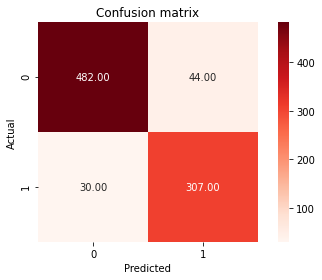

In [13]:
# use heatmap to get result
conf_matrix = metrics.confusion_matrix(y_val,y_val_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Reds)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

accuracy = metrics.accuracy_score(y_val,y_val_pred)
precision = metrics.precision_score(y_val, y_val_pred, average = None)
recall = metrics.recall_score(y_val, y_val_pred, average = None)
F1_score = metrics.f1_score(y_val, y_val_pred, average = None)
print("Accuracy = ",accuracy, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

In [14]:
# TODO: How to get best attributes?

### Classification: K Nearest Neighbors

In [15]:
# train with KNN
# Using K = 3
knnClf = KNeighborsClassifier(n_neighbors = 3, weights='distance')  
knnClf.fit(x_train_scaled,y_train)

# estimate the skill of model with validation dataset
y_val_pred = knnClf.predict(x_val_scaled)

[[498  28]
 [ 41 296]]
Accuracy =  0.9200463499420626 
Precision = [0.92393321 0.91358025] 
Recall =  [0.94676806 0.87833828] 
F1 Score =  [0.93521127 0.89561271]


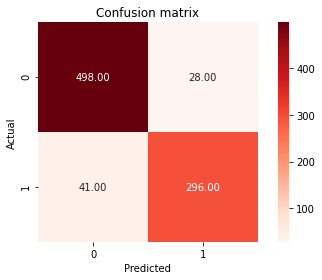

In [16]:
# use heatmap to get result
conf_matrix = metrics.confusion_matrix(y_val,y_val_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Reds)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

accuracy = metrics.accuracy_score(y_val,y_val_pred)
precision = metrics.precision_score(y_val, y_val_pred, average = None)
recall = metrics.recall_score(y_val, y_val_pred, average = None)
F1_score = metrics.f1_score(y_val, y_val_pred, average = None)
print("Accuracy = ",accuracy, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

In [17]:
# Finding the best K value
max_acc = 0
optimal_k = 1
print (f"{'K value':<10}{'Acurracy':<20}{'Precision':<20}{'Recall': <20}{'F1 Score': <20}")
for k in range(1, 20):
    knnClf = KNeighborsClassifier(n_neighbors = k, weights='distance')  
    knnClf.fit(x_train_scaled,y_train)
    y_val_pred = knnClf.predict(x_val_scaled)
    conf_matrix = metrics.confusion_matrix(y_val,y_val_pred)
    accuracy = metrics.accuracy_score(y_val,y_val_pred)
    precision = metrics.precision_score(y_val, y_val_pred, average = None)
    recall = metrics.recall_score(y_val, y_val_pred, average = None)
    F1_score = metrics.f1_score(y_val, y_val_pred, average = None)
    
    if max_acc < accuracy:
        max_acc = accuracy
        optimal_k = k
    print (f"{k:<10}{accuracy:<20}{precision[0]:<20}{recall[0]: <20}{F1_score[0]: <20}")
print (f"{'Optimal k: ':<15}{optimal_k:<20}")
print (f"{'Accuracy ':<15}{max_acc:<20}")

K value   Acurracy            Precision           Recall              F1 Score            
1         0.8876013904982619  0.9132947976878613  0.9011406844106464  0.907177033492823   
2         0.8876013904982619  0.9132947976878613  0.9011406844106464  0.907177033492823   
3         0.9200463499420626  0.9239332096474954  0.9467680608365019  0.9352112676056338  
4         0.9188876013904983  0.9237918215613383  0.9448669201520913  0.9342105263157895  
5         0.9096176129779838  0.9117647058823529  0.9429657794676806  0.9271028037383178  
6         0.9200463499420626  0.9208103130755064  0.9505703422053232  0.9354536950420954  
7         0.9177288528389339  0.9205175600739371  0.9467680608365019  0.9334582942830366  
8         0.9258400926998841  0.9261992619926199  0.9543726235741445  0.9400749063670412  
9         0.9130938586326767  0.9183673469387755  0.94106463878327    0.9295774647887324  
10        0.9212050984936269  0.922509225092251   0.9505703422053232  0.9363295880149813  

### Classification: Naive Bayes

In [18]:
# train with Naive Bayes
nbClf = GaussianNB()  
nbClf.fit(x_train_scaled,y_train)

# estimate the skill of model with validation dataset
y_val_pred = nbClf.predict(x_val_scaled)

[[378 148]
 [ 15 322]]
Accuracy =  0.8111239860950173 
Precision = [0.96183206 0.68510638] 
Recall =  [0.71863118 0.95548961] 
F1 Score =  [0.8226333  0.79801735]


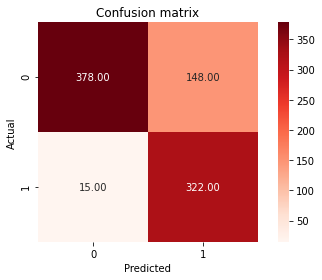

In [19]:
# use heatmap to get result
conf_matrix = metrics.confusion_matrix(y_val,y_val_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Reds)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

accuracy = metrics.accuracy_score(y_val,y_val_pred)
precision = metrics.precision_score(y_val, y_val_pred, average = None)
recall = metrics.recall_score(y_val, y_val_pred, average = None)
F1_score = metrics.f1_score(y_val, y_val_pred, average = None)
print("Accuracy = ",accuracy, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

### Classification: SVM

In [20]:
# train with SVM
svmClf = SVC(kernel = 'rbf', gamma = 'auto')  
svmClf.fit(x_train_scaled,y_train)

# estimate the skill of model with validation dataset
y_val_pred = svmClf.predict(x_val_scaled)

[[509  17]
 [ 35 302]]
Accuracy =  0.9397450753186558 
Precision = [0.93566176 0.94670846] 
Recall =  [0.96768061 0.89614243] 
F1 Score =  [0.95140187 0.92073171]


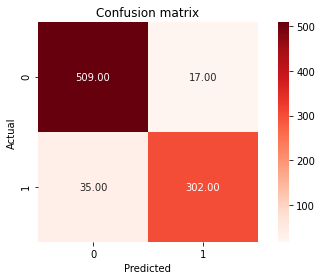

In [21]:
# use heatmap to get result
conf_matrix = metrics.confusion_matrix(y_val,y_val_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Reds)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

accuracy = metrics.accuracy_score(y_val,y_val_pred)
precision = metrics.precision_score(y_val, y_val_pred, average = None)
recall = metrics.recall_score(y_val, y_val_pred, average = None)
F1_score = metrics.f1_score(y_val, y_val_pred, average = None)
print("Accuracy = ",accuracy, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

## Performance Test
### Use SVM for test dataset

In [22]:
y_test_pred = svmClf.predict(x_test_scaled)

[[662  29]
 [ 65 395]]
Accuracy =  0.9183318853171155 
Precision = [0.91059147 0.93160377] 
Recall =  [0.95803184 0.85869565] 
F1 Score =  [0.93370945 0.89366516]


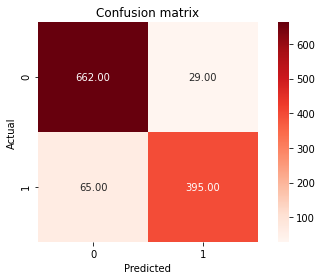

In [23]:
# use heatmap to get result
conf_matrix = metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Reds)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

accuracy = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test, y_test_pred, average = None)
recall = metrics.recall_score(y_test, y_test_pred, average = None)
F1_score = metrics.f1_score(y_test, y_test_pred, average = None)
print("Accuracy = ",accuracy, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)